In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
import math

In [2]:
data = {
    'Comisiones': [22, 13, 33, 38, 23, 47, 29, 38, 41, 32, 20, 13, 47, 38, 44, 29, 38, 37, 14, 34, 25, 27, 25, 43, 34],
    'Llamadas': [139, 132, 144, 142, 142, 142, 138, 139, 144, 134, 135, 137, 146, 146, 144, 147, 144, 149, 131, 144, 132, 132, 127, 154, 147],
    'Millas_recorridas': [2371, 2226, 2731, 3351, 2289, 3449, 3114, 3342, 2842, 2625, 2121, 2219, 3463, 3290, 3103, 2122, 2791, 3209, 2287, 2848, 2690, 2933, 2671, 2988, 2829]
}
df = pd.DataFrame(data)

In [3]:
print(df.head())

   Comisiones  Llamadas  Millas_recorridas
0          22       139               2371
1          13       132               2226
2          33       144               2731
3          38       142               3351
4          23       142               2289


In [4]:
X = df[['Llamadas', 'Millas_recorridas']].values  
y = df['Comisiones'].values 

model = LinearRegression()
model.fit(X, y)

y_pred = model.predict(X)

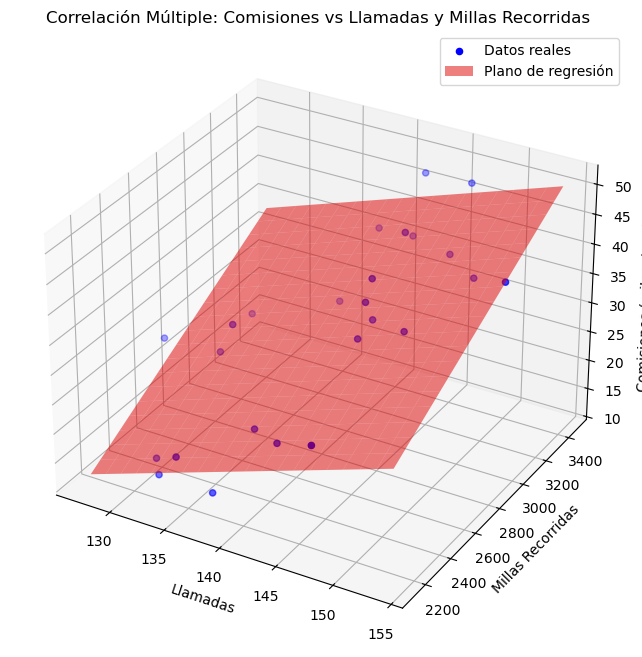

In [5]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(df['Llamadas'], df['Millas_recorridas'], y, color='blue', label='Datos reales')

x_surf, y_surf = np.meshgrid(np.linspace(df['Llamadas'].min(), df['Llamadas'].max(), 20),
                             np.linspace(df['Millas_recorridas'].min(), df['Millas_recorridas'].max(), 20))
z_surf = model.intercept_ + model.coef_[0] * x_surf + model.coef_[1] * y_surf

ax.plot_surface(x_surf, y_surf, z_surf, color='red', alpha=0.5, label='Plano de regresión')

ax.set_title('Correlación Múltiple: Comisiones vs Llamadas y Millas Recorridas')
ax.set_xlabel('Llamadas')
ax.set_ylabel('Millas Recorridas')
ax.set_zlabel('Comisiones (miles de dólares)')
ax.legend()
plt.show()

In [6]:
print("\nInterpretación de la gráfica:")
print("La gráfica 3D muestra los puntos de datos (llamadas, millas recorridas, comisiones).")
print("El plano rojo representa la regresión lineal múltiple ajustada.")
print(f"Coeficientes: Llamadas = {model.coef_[0]:.2f}, Millas Recorridas = {model.coef_[1]:.4f} (indican el cambio en comisiones por unidad de cada variable, manteniendo la otra constante).")
print(f"Intersección: {model.intercept_:.2f} (comisiones base sin llamadas ni millas).")
print(f"R²: {r2_score(y, y_pred):.2f} (explica el {r2_score(y, y_pred)*100:.2f}% de la variabilidad en las comisiones).")
print("Observación: Hay una relación positiva general, con el plano inclinado hacia valores más altos de llamadas y millas. Sin embargo, hay dispersión, sugiriendo que estas variables explican parte, pero no toda, la variabilidad en comisiones. Posibles factores adicionales podrían influir.")


Interpretación de la gráfica:
La gráfica 3D muestra los puntos de datos (llamadas, millas recorridas, comisiones).
El plano rojo representa la regresión lineal múltiple ajustada.
Coeficientes: Llamadas = 0.63, Millas Recorridas = 0.0157 (indican el cambio en comisiones por unidad de cada variable, manteniendo la otra constante).
Intersección: -101.31 (comisiones base sin llamadas ni millas).
R²: 0.84 (explica el 83.53% de la variabilidad en las comisiones).
Observación: Hay una relación positiva general, con el plano inclinado hacia valores más altos de llamadas y millas. Sin embargo, hay dispersión, sugiriendo que estas variables explican parte, pero no toda, la variabilidad en comisiones. Posibles factores adicionales podrían influir.


In [12]:
R_multiple = math.sqrt(r2_score(y, y_pred))
print(f"\nCoeficiente de correlación múltiple R: {R_multiple:.2f}")
print("Interpretación: R mide la relación lineal entre las variables independientes combinadas y la dependiente. Cuanto más cercano a 1, más fuerte.")
print(f"Esto confirma el análisis gráfico: correlación moderada de {R_multiple:.2f}, alineada con la grafica que muestra correlaciones positivas pero no perfectas")


Coeficiente de correlación múltiple R: 0.91
Interpretación: R mide la relación lineal entre las variables independientes combinadas y la dependiente. Cuanto más cercano a 1, más fuerte.
Esto confirma el análisis gráfico: correlación moderada de 0.91, alineada con la grafica que muestra correlaciones positivas pero no perfectas
